SPECT Heart Data Set
https://archive.ics.uci.edu/ml/datasets/SPECT+Heart
Data on cardiac Single Proton Emission Computed Tomography (SPECT) images. 
Each patient classified into two categories: normal and abnormal.

23 Attributes:
Attribute Information:
OVERALL_DIAGNSIS: 
0,1 (class attribute, binary) 
2.- 23. F1-F22: 0,1 (the partial diagnosis 1-22, binary)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readFile(filename):
    contents=[]
    file1=open(filename,'r')
    for line in iter(file1):
        line=line.strip()
        contents.append(line.split(','))
    return contents

In [3]:
trainDS=readFile('../dataSet/SPECT/SPECT.train')
testDS=readFile('../dataSet/SPECT/SPECT.test')

In [4]:
datasetTrain = np.array(trainDS)
Xtp = datasetTrain[:,1:]
Ytp = datasetTrain[:,0]
Xtrain = Xtp.astype(np.int)
Ytrain = Ytp.astype(np.int)

In [5]:
datasetTest = np.array(testDS)
Xtp = datasetTest[:,1:]
Ytp = datasetTest[:,0]
Xtest = Xtp.astype(np.int)
Ytest = Ytp.astype(np.int)

In [6]:
X_header=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10",\
          "F11","F12","F13","F14","F15","F16","F17","F18","F19","F20",\
          "F21","F22"]
df_Xy = pd.DataFrame(Xtrain,columns=X_header)
df_Xy["class"]=Ytrain

In [7]:
print(df_Xy.head(2))
print(df_Xy.tail(2))
print(df_Xy.describe())

   F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...    F14  F15  F16  F17  F18  \
0   0   0   0   1   0   0   0   1   1    0  ...      1    0    0    0    0   
1   0   0   1   1   0   0   0   1   1    0  ...      1    0    0    0    0   

   F19  F20  F21  F22  class  
0    0    0    0    0      1  
1    0    0    0    1      1  

[2 rows x 23 columns]
    F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  ...    F14  F15  F16  F17  F18  \
78   0   0   1   1   0   0   1   0   0    0  ...      1    0    0    0    0   
79   1   0   0   0   1   0   0   0   0    0  ...      0    0    0    0    0   

    F19  F20  F21  F22  class  
78    0    0    1    1      0  
79    0    0    0    0      0  

[2 rows x 23 columns]
              F1         F2         F3         F4         F5         F6  \
count  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
mean    0.362500   0.162500   0.262500   0.212500   0.300000   0.125000   
std     0.483755   0.371236   0.442769   0.411658   0.461149   0.33

In [8]:
#print(len(Xtrain)) #80
#print(len(Xtest))  #187
#print(Xtrain[:2])
#print(Xtest[:2])

In [9]:
#t1=Xtrain.T
#print(Xtrain.shape) #(80,22)
#print(t1.shape)     #(22,80)

In [10]:
covariant_matrix = np.cov(Xtrain.T)
#print(covariant_matrix.shape) #(22,22)
print(covariant_matrix)

[[ 0.23401899  0.0289557   0.04287975  0.01060127  0.19367089  0.03006329
   0.03022152  0.02563291  0.01977848  0.18560127  0.05316456  0.04746835
   0.03607595  0.04050633  0.01044304  0.02436709  0.02658228  0.01044304
   0.09572785  0.04398734  0.02674051  0.00727848]
 [ 0.0289557   0.13781646  0.02009494 -0.0096519   0.03924051  0.05537975
   0.0960443   0.01803797  0.01977848  0.02863924  0.06835443  0.08544304
   0.0056962   0.01772152 -0.01234177  0.05981013  0.05949367  0.05094937
   0.04509494  0.02626582  0.03686709  0.03512658]
 [ 0.04287975  0.02009494  0.1960443   0.08275316  0.00886076 -0.00791139
   0.03148734  0.14208861  0.05142405  0.0375     -0.00253165  0.03481013
   0.13481013  0.07341772  0.0306962   0.06740506  0.02405063  0.0306962
   0.00079114  0.01613924  0.10142405  0.0528481 ]
 [ 0.01060127 -0.0096519   0.08275316  0.16946203 -0.02658228 -0.01424051
  -0.00585443  0.05474684  0.08623418  0.00142405  0.00759494  0.0221519
   0.07658228  0.09620253  0.034493

In [11]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [12]:
print(eigen_vectors)

[[ 2.85732474e-01 -3.71603131e-01 -3.24490194e-01  1.50185153e-01
  -3.04576553e-02 -3.75234025e-02  1.47225299e-01  5.85254702e-03
  -1.17744077e-01  2.75409009e-02  1.39159195e-01  4.36638221e-02
   5.88282230e-02 -6.11085425e-01  1.88336364e-01 -2.36817198e-01
   1.16189634e-01 -1.50052405e-01  2.49512218e-01  8.58262313e-02
  -1.35454030e-01  7.36468173e-03]
 [ 1.93957094e-01 -1.16129588e-01  3.01518224e-01 -7.61287973e-02
   1.70787409e-01  4.85221326e-02 -9.53866256e-02 -2.23013484e-01
   4.90287050e-02 -4.14615456e-01 -1.41827531e-02 -5.00194512e-02
   2.56172936e-01 -1.24252286e-01  1.40563956e-01  1.43688336e-01
  -3.00099189e-01 -1.76559177e-02  3.40004935e-02  2.27074449e-01
   1.53308392e-01 -5.44752387e-01]
 [ 2.86959599e-01  2.67187490e-01 -1.64030830e-01  1.35037433e-01
   2.10942946e-01  1.84724244e-01  7.06607578e-02  6.66200988e-02
   9.43291828e-02 -2.42329286e-01 -9.69204946e-02  4.28912927e-01
  -1.79693418e-01 -5.14125827e-03 -2.18695618e-01  7.94101739e-02
   2.1

In [13]:
print(eigen_values)

[0.97162501 0.62326027 0.43692777 0.28748163 0.21422803 0.19987048
 0.14739078 0.10609207 0.09848479 0.09078391 0.08620914 0.07525841
 0.06609923 0.00852076 0.01380689 0.01579292 0.05469604 0.04913823
 0.02619705 0.04145432 0.03502432 0.03061366]


22
[0.26410348081154605, 0.1694122780273517, 0.11876407509122915, 0.07814218380068887, 0.05823066249180308, 0.05432804684468994, 0.040063211478327525, 0.028837551319995585, 0.026769766641854705, 0.02467654269907978, 0.023433046757608118, 0.02045645968646183, 0.01796684673150391, 0.01486727257938472, 0.013356571085971622, 0.011267957404374923, 0.009520180095014642, 0.008321290913889758, 0.0071207852949551915, 0.004292772198721527, 0.0037529359388084526, 0.002316082106738952]


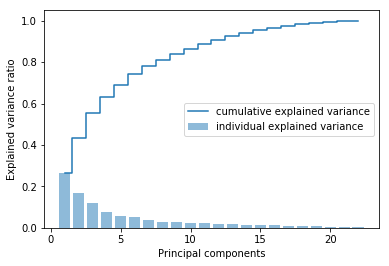

In [14]:
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
ub=len(var_exp)
print(ub)
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,ub+1),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,ub+1),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(Xtrain)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2','principal component 3',\
                                      'principal component 4','principal component 5','principal component 6',\
                                      'principal component 7'])

In [16]:
print(pca.explained_variance_ratio_)

[0.26410348 0.16941228 0.11876408 0.07814218 0.05823066 0.05432805
 0.04006321]


In [17]:
print(pca.components_)

[[ 0.28573247  0.19395709  0.2869596   0.17473468  0.2159503   0.07601637
   0.25301934  0.22303585  0.19384151  0.24408277  0.15336971  0.27199568
   0.29255199  0.23170377  0.0688465   0.24357177  0.1487634   0.13791205
   0.1661136   0.15783958  0.26152253  0.20404954]
 [ 0.37160313  0.11612959 -0.26718749 -0.25717804  0.4166722   0.18296028
   0.06171036 -0.26237742 -0.14510145  0.31116007  0.1783315   0.0691191
  -0.29105872 -0.12729056 -0.10102255 -0.11673237  0.09061201 -0.03149865
   0.28182693  0.07405465 -0.19731423 -0.13749285]
 [-0.32449019  0.30151822 -0.16403083 -0.13674966 -0.23305679  0.1264791
   0.39431396 -0.18272437 -0.13456745 -0.30401151  0.21973715  0.36441708
  -0.15099946 -0.16931843 -0.08881334  0.09654269  0.18299426  0.19055483
  -0.00662726 -0.02965469  0.08565787  0.24627229]
 [-0.15018515  0.0761288  -0.13503743  0.25466246 -0.13365435  0.25230264
  -0.16710676 -0.08417435  0.39876744 -0.23219631  0.22228095 -0.1305514
  -0.17949536  0.38084403  0.0617537

In [18]:
print(principalDf.head())
print(principalDf.tail())

   principal component 1  principal component 2  principal component 3  \
0               0.044252              -1.148234              -0.703758   
1               0.535261              -1.552914              -0.621516   
2               0.476697               0.213584              -1.288712   
3              -0.294834              -0.147649               0.592614   
4              -0.243610              -0.836419              -0.255393   

   principal component 4  principal component 5  principal component 6  \
0               0.809678              -0.249585               0.327795   
1               0.462971               0.112252               0.103097   
2              -0.875670              -0.512198              -0.538623   
3               0.047647               0.648855              -0.268912   
4              -0.013204              -0.407656              -0.619841   

   principal component 7  
0               0.018767  
1              -0.554649  
2               0.002781  
3 

In [19]:
# save the model to disk
import pickle
filename = 'spect_pca.pkl'
pickle.dump(pca, open(filename, 'wb'))